#Project Descrition
Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

The data & attributes information for this project is available at -

https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/

The data consists of those diagnosed with Parkinson Disease and those who do not.

##Steps to be followed:

1. Load the data set
2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the data set. (2.5 points)
3. Using uni-variate & bi-variate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)
4. Split the data set into training and test set in the ratio of 70:30 (Training:Test)
5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)
6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a cross-tab. (7.5 points)
7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points)
8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)



#Solution Below

##Importing required libraries

In [0]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#import time

from sklearn.model_selection import train_test_split

##Load the data set

In [27]:
data_raw = pd.read_csv('https://raw.githubusercontent.com/GreatLearningAIML1/bangalore-aug19-batch-knightriderX/master/Residency4/EnsembleTechinques/DataSets/parkinsons.data?token=ABRYHI3ZZKBWFHS2L6NARBS6PM4RI')
data_raw.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


##About the dataset

In [28]:
data_raw.shape

(195, 24)

In [29]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [0]:
data_raw.drop("name",axis=1,inplace=True)

In [31]:
data_raw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


##### 
**KG Observations:**



There is high standard deviation in 

MDVP:Fo(Hz); 
MDVP:Fhi(Hz); 
MDVP:Flo(Hz)


Spread1 seems to be negative

##Uni-variate and Bi-variate analysis

In [32]:
data_raw.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

In [33]:
columns = data_raw.columns
columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

MDVP:Fo(Hz)
MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
status
RPDE
DFA
spread1
spread2
D2
PPE


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much

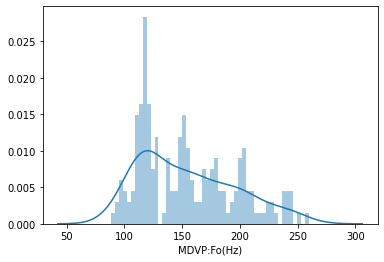

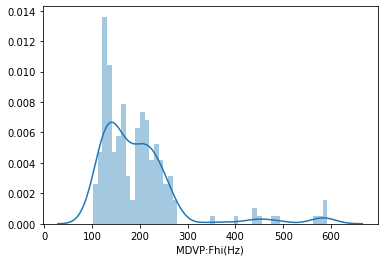

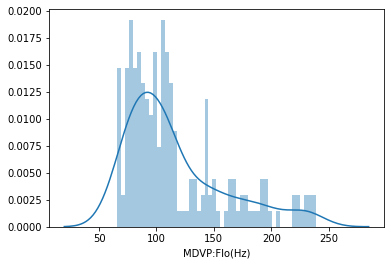

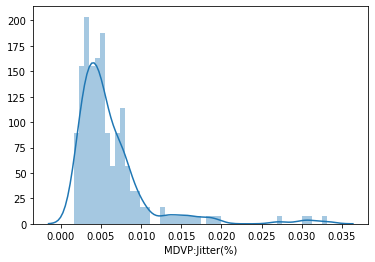

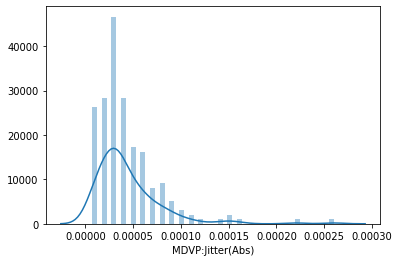

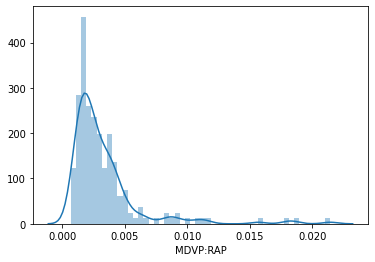

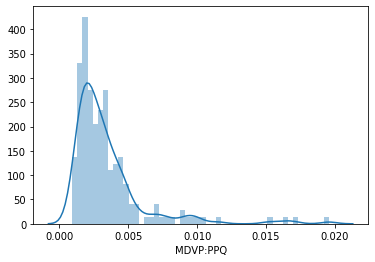

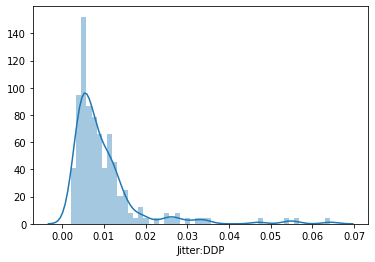

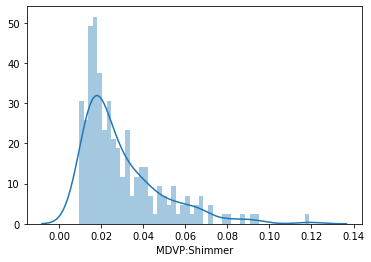

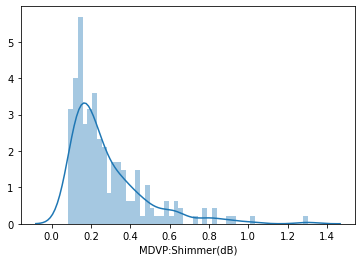

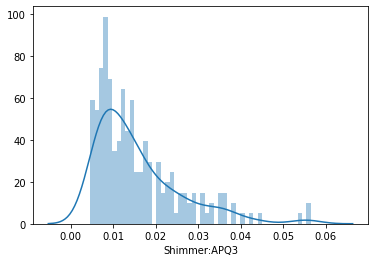

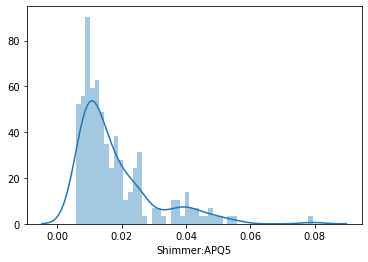

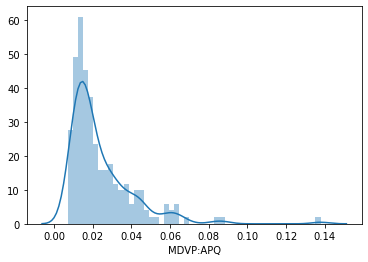

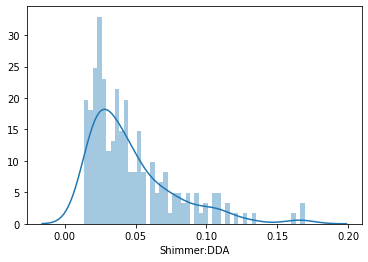

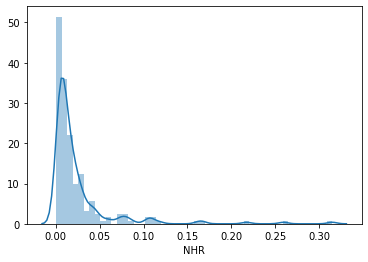

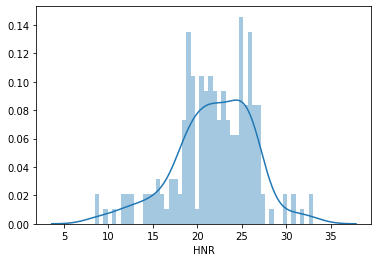

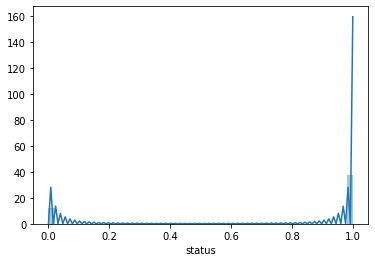

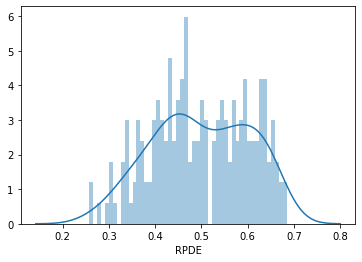

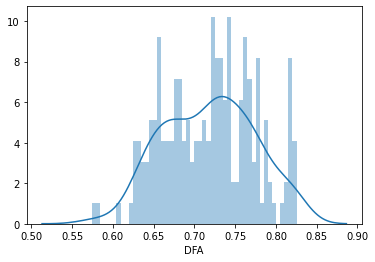

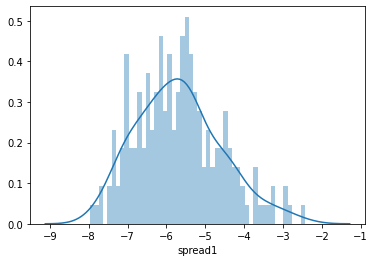

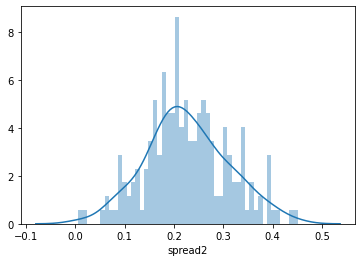

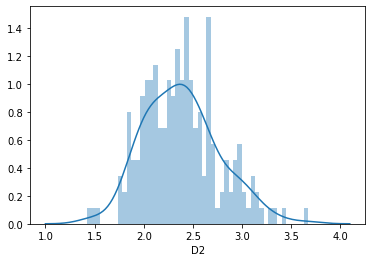

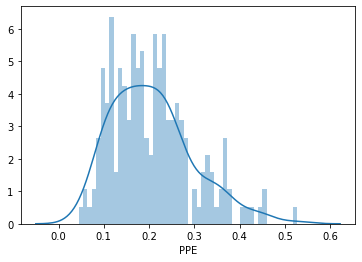

In [34]:
for column in columns:
  if data_raw[column].dtype != 'object':
    print(data_raw[column].name)
    plt.figure()
    sns.distplot(data_raw[column],bins=50)
    #time.sleep(3)
  else:
    print("Cannot be plotted")

##### 
**KG Observations:**


---


The below are highly skewed:

MDVP:Fhi(Hz), 
MDVP:Flo(Hz), 
MDVP:Jitter, 
MDVP:Jitter(Abs), 
MDVP:RAP, 
MDVP:PPQ, 
Jitter:DDP, 
MDVP:Shimmer, 
MDVP:Shimmer(dB), 
Shimmer:APQ3, 
Shimmer:APQ5, 
MDVP:APQ 
Shimmer:DDA

The below columns are mostly symmetrical:

MDVP:Fo(Hz),
HNR,
DFA,
spread1,
spread2

In [35]:
data_raw.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,-0.094717,-0.070682,-0.077774,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,-0.003743,-0.009997,0.004937,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,-0.150747,-0.101095,-0.107293,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,0.746625,0.725561,0.758255,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,0.697153,0.648961,0.648793,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,0.744912,0.709927,0.737455,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,0.763580,0.786780,0.804139,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,0.744894,0.709907,0.737439,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,0.987625,0.982835,0.950083,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,0.963198,0.973751,0.960977,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


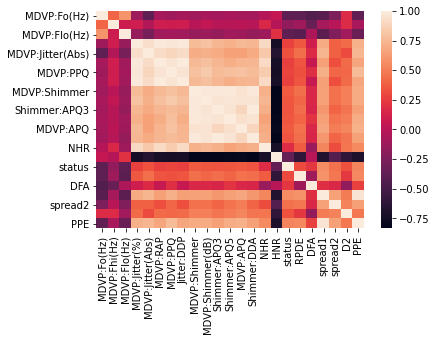

In [36]:
sns.heatmap(data_raw.corr())

##### 
**KG Observations:**

---

The below columns are 100% correlated:

Shimmer:APQ3, Shimmer:DDA

MDVP:RAP, Jitter:DDP


The below columns are also highly correlated:

MDVP:Jitter(%), Jitter:DDP

MDVP:Jitter(%), MDVP:RAP

MDVP:Shimmer, Shimmer:DDA

MDVP:Shimmer(dB), MDVP:APQ

Shimmer:APQ5, Shimmer:DDA

Shimmer:APQ3, Shimmer:APQ5

MDVP:PPQ, Jitter:DDP

MDVP:RAP, MDVP:PPQ

MDVP:Shimmer, MDVP:APQ

Shimmer:APQ5, MDVP:APQ

MDVP:Jitter(%), MDVP:Jitter(Abs)

MDVP:Jitter(Abs), Jitter:DDP

MDVP:Jitter(Abs), MDVP:RAP

Jitter:DDP, NHR

MDVP:RAP, NHR

MDVP:Jitter(%), NHR

MDVP:Shimmer, Shimmer:APQ3

MDVP:Shimmer, MDVP:Shimmer(dB)

MDVP:Shimmer, Shimmer:APQ5

MDVP:Jitter(%), MDVP:PPQ

MDVP:Shimmer(dB), Shimmer:APQ5

MDVP:Shimmer(dB), Shimmer:DDA

DVP:Shimmer(dB), Shimmer:APQ3

spread1, PPE


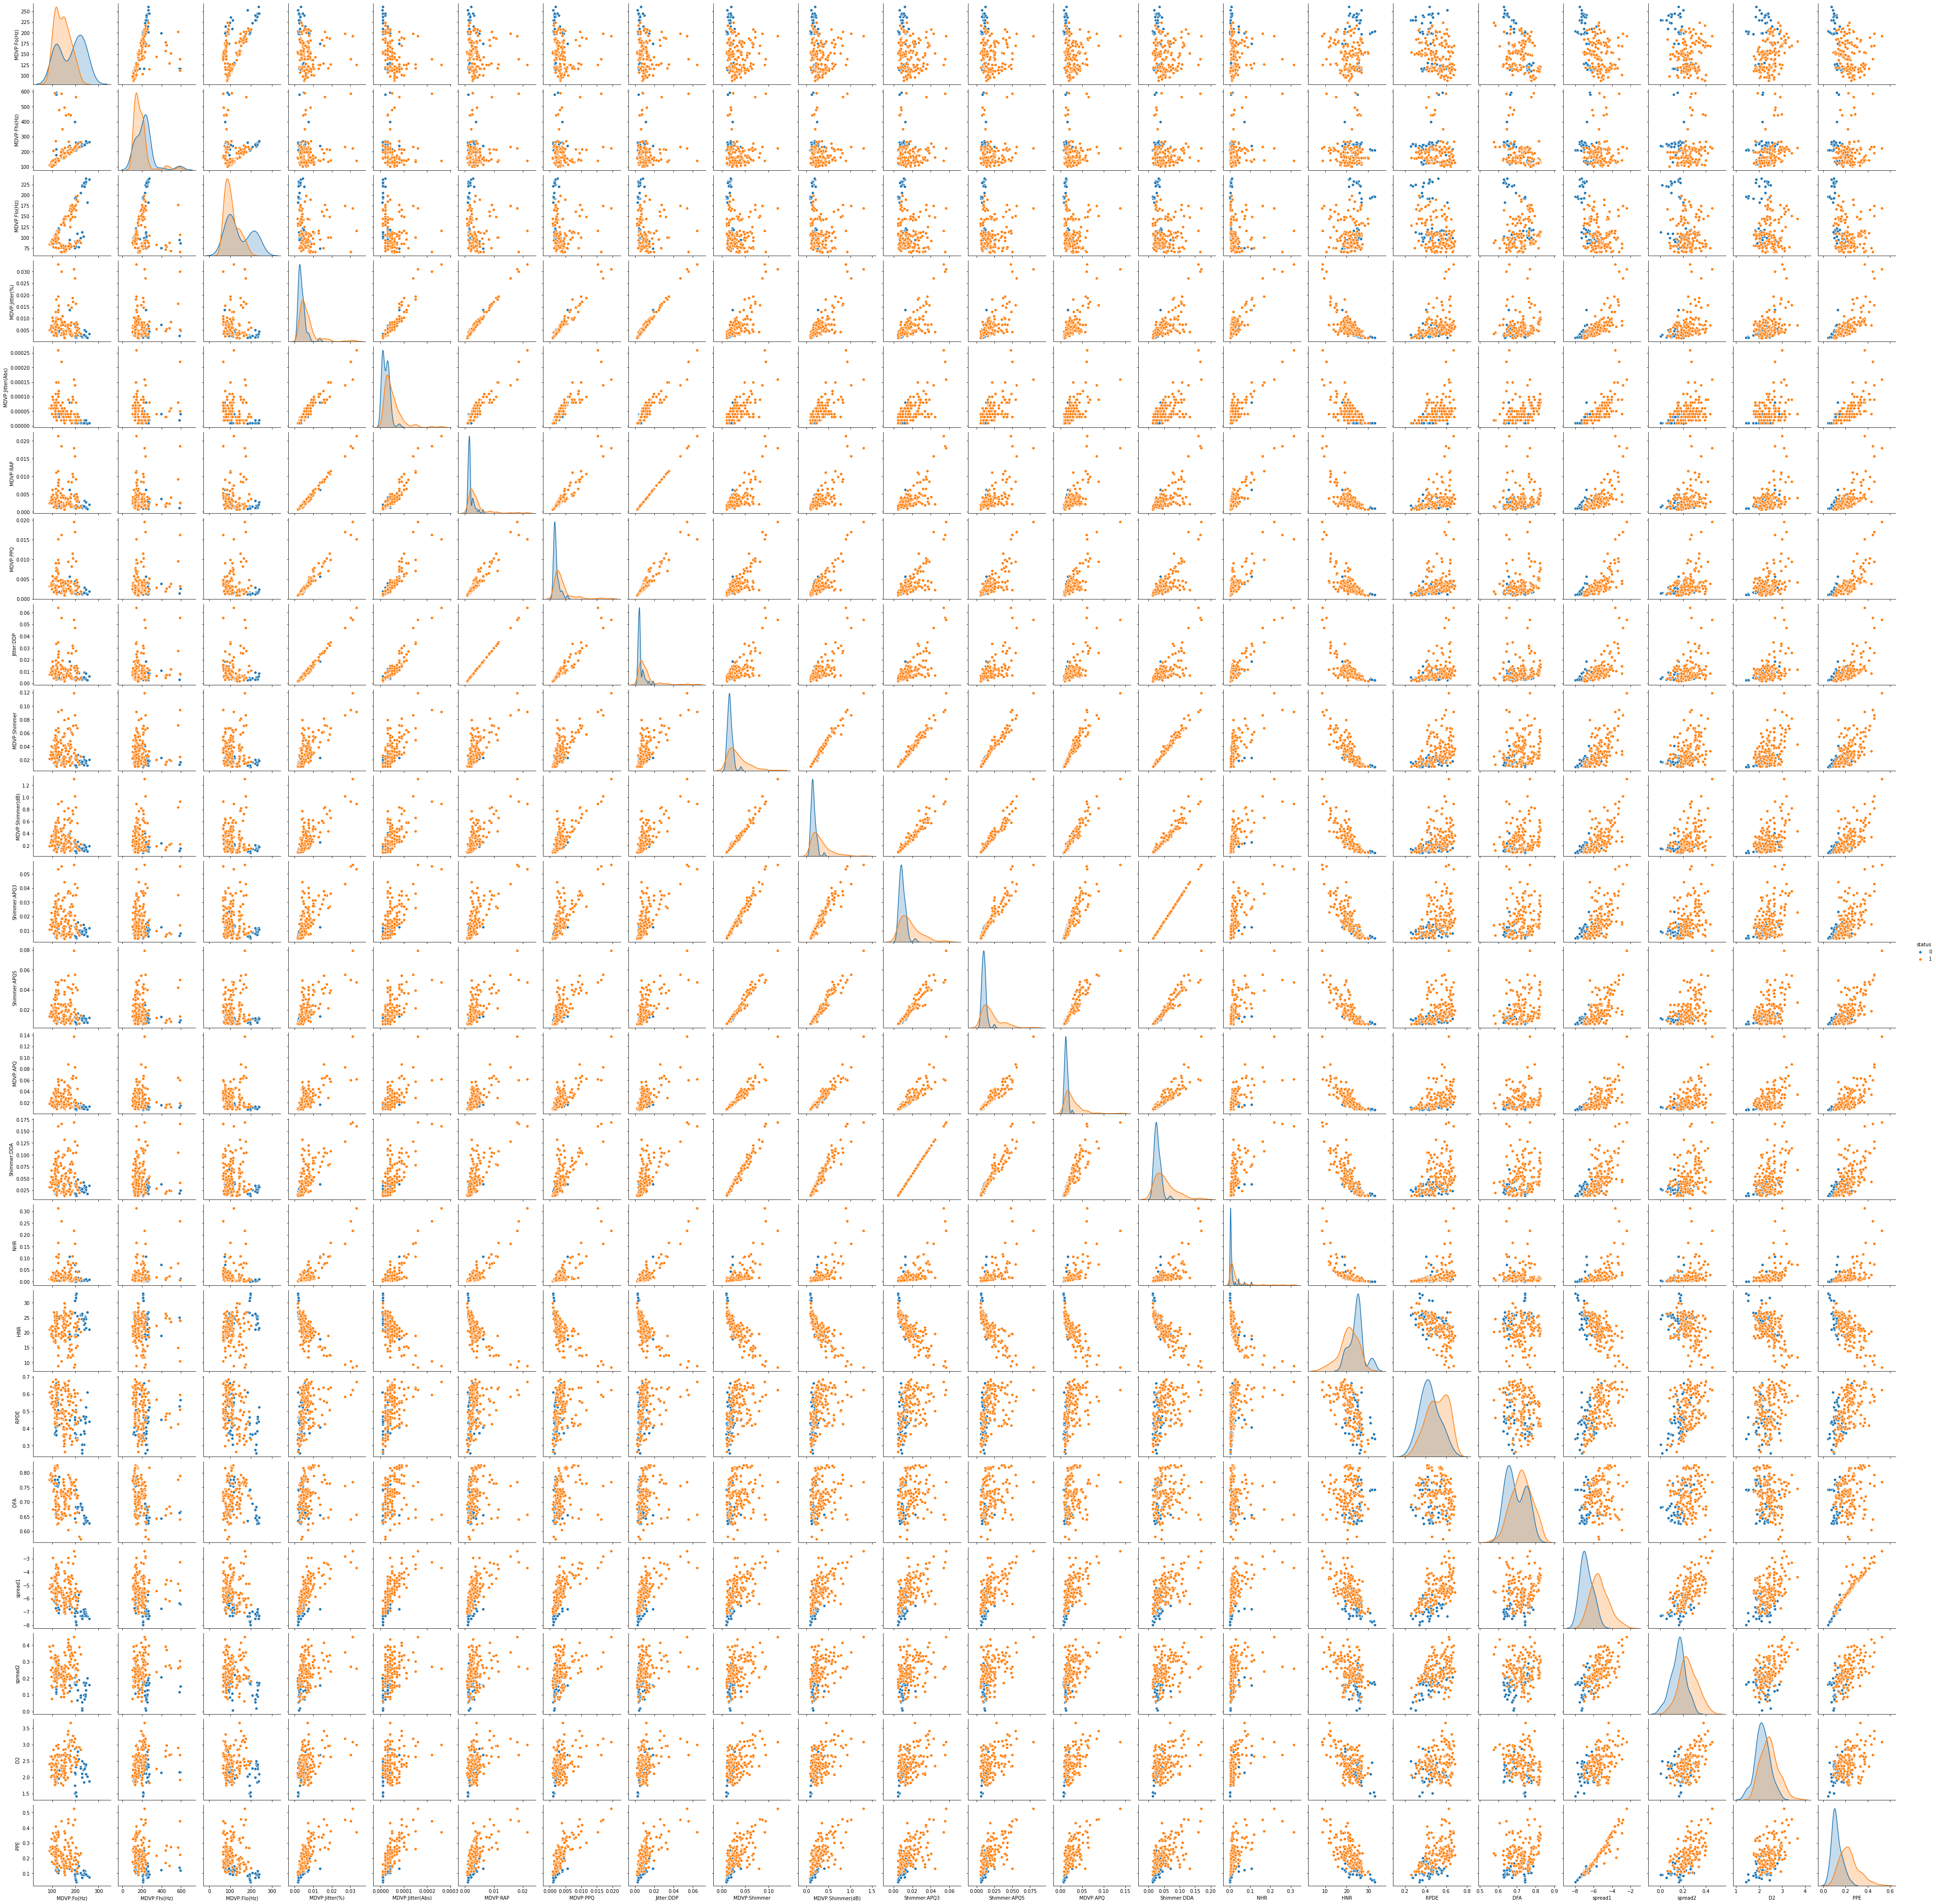

In [37]:
sns.pairplot(data_raw,diag_kind='kde',hue='status')

##Train:Test Split (70:30)

In [0]:
from sklearn.model_selection import train_test_split

X =  data_raw.drop("status", axis=1)
y =  data_raw.pop("status")

train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

##Entropy

In [39]:
from sklearn.tree import DecisionTreeClassifier

decisionTreeModel = DecisionTreeClassifier(criterion = 'entropy')

decisionTreeModel.fit(train_set, train_labels)

decisionTreeModel.score(test_set , test_labels)   

0.847457627118644

In [40]:
p_test_labels = decisionTreeModel.predict(test_set)

p_test_labels

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1])

In [41]:
from sklearn.metrics import confusion_matrix

confusionMatrix = confusion_matrix(test_labels,p_test_labels)

confusionMatrix

array([[11,  8],
       [ 1, 39]])

##### 
**KG Observations:**

---

Not so good accuracy. Let's check with some changes

##Regularization and Model Accuracy

In [42]:
decisionTreeModel = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)

decisionTreeModel.fit(train_set, train_labels)

print("On train set : ",decisionTreeModel.score(train_set,train_labels))

print("On test set : ",decisionTreeModel.score(test_set,test_labels))


On train set :  0.9779411764705882
On test set :  0.8983050847457628


In [43]:
decisionTreeModel = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)

decisionTreeModel.fit(train_set, train_labels)

print("On train set : ",decisionTreeModel.score(train_set,train_labels))

print("On test set : ",decisionTreeModel.score(test_set,test_labels))

On train set :  1.0
On test set :  0.8983050847457628


In [44]:
decisionTreeModel = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)

decisionTreeModel.fit(train_set, train_labels)

print("On train set : ",decisionTreeModel.score(train_set,train_labels))

print("On test set : ",decisionTreeModel.score(test_set,test_labels))

On train set :  0.8970588235294118
On test set :  0.7966101694915254


##### 
**KG Observations:**

---

For max_depth>3, the model would fail to generalize further on unknown data

##Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

randomForestClassifierModel = RandomForestClassifier(n_estimators = 41)

randomForestClassifierModel.fit(train_set, train_labels)

test_p = randomForestClassifierModel.predict(test_set)
randomForestClassifierModel.score(test_set, test_labels)


0.847457627118644

Estimator 1 with score: 0.7796610169491526
Estimator 11 with score: 0.847457627118644
Estimator 21 with score: 0.847457627118644
Estimator 31 with score: 0.864406779661017
Estimator 41 with score: 0.864406779661017
Estimator 51 with score: 0.864406779661017
Estimator 61 with score: 0.847457627118644
Estimator 71 with score: 0.847457627118644
Estimator 81 with score: 0.847457627118644
Estimator 91 with score: 0.864406779661017
[1, 11, 21, 31, 41, 51, 61, 71, 81, 91] [0.7796610169491526, 0.847457627118644, 0.847457627118644, 0.864406779661017, 0.864406779661017, 0.864406779661017, 0.847457627118644, 0.847457627118644, 0.847457627118644, 0.864406779661017]


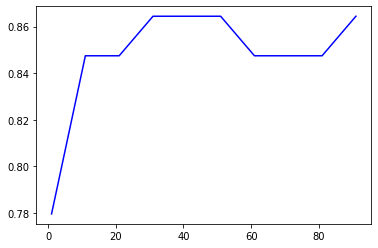

In [49]:
n_est = range(1, 100, 10)
ests=[]
scores=[]
for est in n_est:
    randomForestClassifierModel = RandomForestClassifier(n_estimators = est)
    randomForestClassifierModel.fit(train_set, train_labels)
    test_p = randomForestClassifierModel.predict(test_set)
    score = randomForestClassifierModel.score(test_set , test_labels)
    print("Estimator %i with score: %r" % (est, score))
    ests.append(est)
    scores.append(score)
print(ests,scores)
plt.plot(ests,scores,'b') 
plt.show()